In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import files

df = files.upload()

Saving INOColab.xlsx to INOColab (2).xlsx


In [ ]:
# Загрузка данных
df = pd.read_excel('INOColab (2).xlsx')

# Подготовка признаков и целевой переменной
X = df[['Визиты', 'Просмотры']]
y = df['Посетители']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание и обучение модели RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Прогноз на 7 дней вперед
forecast = model.predict(X_test)  # X_test можно заменить на новые данные для прогноза

# Оценка качества модели
mse = mean_squared_error(y_test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1464.7185328767125


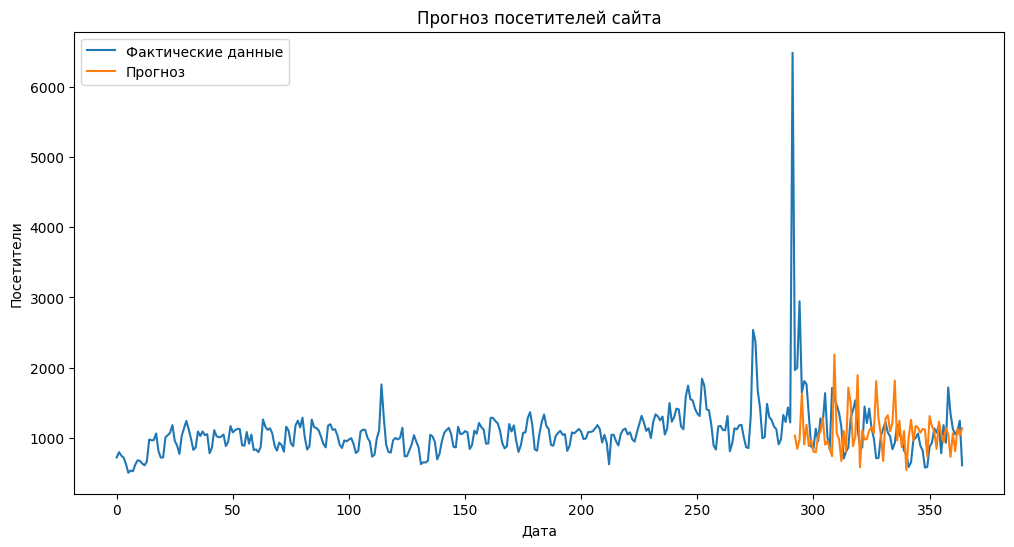

In [ ]:
# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label='Фактические данные')
plt.plot(df.index[-len(forecast):], forecast, label='Прогноз')
plt.legend()
plt.title('Прогноз посетителей сайта')
plt.xlabel('Дата')
plt.ylabel('Посетители')
plt.show()